<a href="https://colab.research.google.com/github/subbu27iitb/DL_Regression/blob/main/Regression_Conv1D_Self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=JzoIHdkFcQU

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model, Sequential

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.boston_housing.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

57026/57026 [==============================] - 0s 0us/step
(404, 13)
(404,)
(102, 13)
(102,)


In [ ]:
print(x_train[0])
print(y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
df=pd.DataFrame(x_train, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [ ]:
columnx_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
columny_names =['Target']
df_x=pd.DataFrame(x_train, columns=columnx_names)
df_y=pd.DataFrame(y_train, columns=columny_names)
df1=pd.concat([df_x,df_y],axis=0)
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,NaN
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,NaN
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,NaN
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,NaN
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,NaN


Feature standardization

In [ ]:
mean=x_train.mean(axis=0) #default mean() will calculate across columns i.e., axis=1
std=x_train.std(axis=0) #default mean() will calculate across columns i.e., axis=1
x1_train=(x_train-mean)/std
x1_test=(x_test-mean)/std
print(x1_train[0])
print(x1_test[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]


In [ ]:
model_MLP= Sequential([
    Dense(64,activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(1)
])

model_MLP.compile(loss='mse', optimizer=keras.optimizers.RMSprop(0.001), metrics=['mae'])
model_MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


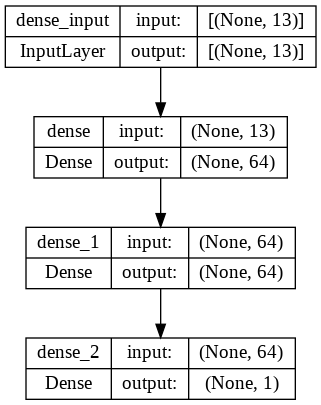

In [ ]:
keras.utils.plot_model(model_MLP, show_shapes=True)

In [ ]:
epochs=500
history=model_MLP.fit(x1_train,y_train,epochs=epochs,validation_split=0.2)

Epoch 1/500
11/11 [==============================] - 3s 19ms/step - loss: 525.6967 - mae: 20.8881 - val_loss: 553.5205 - val_mae: 21.5283
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 454.0155 - mae: 19.0977 - val_loss: 481.6700 - val_mae: 19.8230
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 383.2323 - mae: 17.2046 - val_loss: 404.1795 - val_mae: 17.8388
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 309.4504 - mae: 15.1604 - val_loss: 322.7542 - val_mae: 15.5752
Epoch 5/500
11/11 [==============================] - 0s 5ms/step - loss: 235.8734 - mae: 12.8792 - val_loss: 238.7277 - val_mae: 13.0148
Epoch 6/500
11/11 [==============================] - 0s 5ms/step - loss: 166.6859 - mae: 10.5143 - val_loss: 170.3329 - val_mae: 10.5030
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 115.3106 - mae: 8.5679 - val_loss: 120.9334 - val_mae: 8.5662
Epoch 8/500
11/11 [=======================

In [ ]:
hist_df = pd.DataFrame(history.history) 
hist_df.head()

,loss,mae,val_loss,val_mae
0,525.696716,20.888077,553.520508,21.528316
1,454.015533,19.097656,481.669952,19.822950
2,383.232300,17.204594,404.179504,17.838774
3,309.450409,15.160433,322.754150,15.575197
4,235.873383,12.879178,238.727722,13.014752


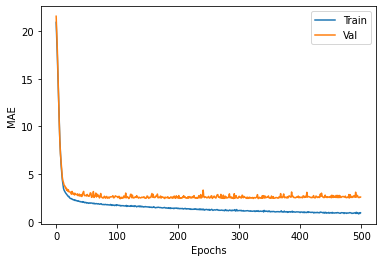

In [ ]:
plt.plot(history.epoch,np.array(history.history['mae']),label='Train')
plt.plot(history.epoch,np.array(history.history['val_mae']),label='Val')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

In [ ]:
[test_loss,test_accuracy]= model_MLP.evaluate(x1_test,y_test)
print(test_loss)
print(test_accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 17.3972 - mae: 2.6803
17.39718246459961
2.680251359939575


4/4 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Real Vs Predictions')

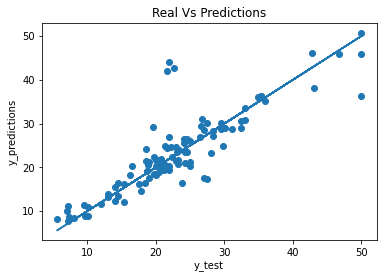

In [ ]:
y_predictions= model_MLP.predict(x1_test)
plt.scatter(y_test,y_predictions)
plt.plot(y_test,y_test)
plt.xlabel('y_test')
plt.ylabel('y_predictions')
plt.title('Real Vs Predictions')

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  4.,
         2.,  4.,  4.,  9., 14.,  6., 12., 12.,  9.,  8.,  5.,  2.,  1.,
         2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([-13.61629105, -12.90146153, -12.18663202, -11.47180251,
        -10.75697299, -10.04214348,  -9.32731396,  -8.61248445,
         -7.89765494,  -7.18282542,  -6.46799591,  -5.7531664 ,
         -5.03833688,  -4.32350737,  -3.60867786,  -2.89384834,
         -2.17901883,  -1.46418932,  -0.7493598 ,  -0.03453029,
          0.68029922,   1.39512874,   2.10995825,   2.82478777,
          3.53961728,   4.25444679,   4.96927631,   5.68410582,
          6.39893533,   7.11376485,   7.82859436,   8.54342387,
          9.25825339,   9.9730829 ,  10.68791241,  11.40274193,
         12.11757144,  12.83240096,  13.54723047,  14.26205998,
         14.9768895 ,  15.69171901,  16.40654852,  17.12137804,
         17.

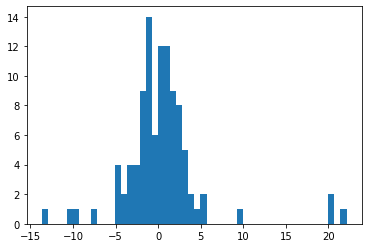

In [ ]:
#residues=y_predictions-y_test
residues=y_predictions.flatten()-y_test
plt.hist(residues,bins=50)

**CNN_Conv1D_Regression**

**Reshape Data sets**
Conv1D layer expects input shape in 3D as

[#layers, #features, #channels]

However, current data is in the shape of

[#layers, #features]

In [ ]:
#Ruff
import numpy as np
A=np.array([[1,2,3],[4,5,6]])
B=np.array([1,2,3])
A
A[0]
B

print(A.shape)
print(A[0].shape)
#print(B.shape)

(2, 3)
(3,)


In [ ]:
layers=x1_train.shape[0]
features=x1_train.shape[1]
channels=1
x1_train_reshaped=x1_train.reshape(layers,features,channels)
print(x1_train_reshaped.shape)
print(x1_train_reshaped[0].shape)
print(x1_train_reshaped[0])

(404, 13, 1)
(13, 1)
[[-0.27224633]
 [-0.48361547]
 [-0.43576161]
 [-0.25683275]
 [-0.1652266 ]
 [-0.1764426 ]
 [ 0.81306188]
 [ 0.1166983 ]
 [-0.62624905]
 [-0.59517003]
 [ 1.14850044]
 [ 0.44807713]
 [ 0.8252202 ]]


In [ ]:
model_conv1D=Sequential([
    Conv1D(64,7,activation='relu', input_shape=(features,channels)),
    Dropout(0.5),
    Conv1D(32,3,activation='relu'),
    Conv1D(16,2,activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(channels)

])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model_conv1D.compile(loss='mse',optimizer=optimizer,metrics=['mae'])

model_conv1D.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 7, 64)             512       
                                                                 
 dropout_2 (Dropout)         (None, 7, 64)             0         
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 32)             6176      
                                                                 
 conv1d_8 (Conv1D)           (None, 4, 16)             1040      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 16)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                      

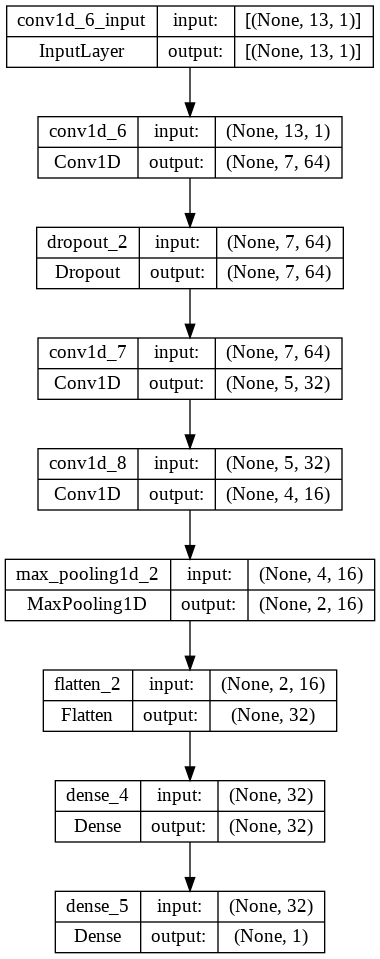

In [ ]:
keras.utils.plot_model(model_conv1D,show_shapes=True)

In [ ]:
epochs=500
history=model_conv1D.fit(x1_train,y_train, epochs=epochs, validation_split=0.2)

Epoch 1/500
11/11 [==============================] - 10s 35ms/step - loss: 515.6428 - mae: 20.7717 - val_loss: 470.9057 - val_mae: 19.6578
Epoch 2/500
11/11 [==============================] - 0s 6ms/step - loss: 298.7617 - mae: 14.8684 - val_loss: 198.8055 - val_mae: 11.5679
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 114.7148 - mae: 8.5241 - val_loss: 97.7326 - val_mae: 7.4540
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: 80.4187 - mae: 7.0022 - val_loss: 81.4583 - val_mae: 6.7133
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 70.3514 - mae: 6.3327 - val_loss: 75.5743 - val_mae: 6.5442
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 61.1524 - mae: 5.8954 - val_loss: 69.5816 - val_mae: 6.0523
Epoch 7/500
11/11 [==============================] - 0s 6ms/step - loss: 55.9166 - mae: 5.5107 - val_loss: 55.5026 - val_mae: 5.4088
Epoch 8/500
11/11 [==============================] - 0s 6m

In [ ]:
[test_loss,test_accuracy]= model_conv1D.evaluate(x1_test,y_test)
print(test_loss)
print(test_accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 11.8774 - mae: 2.5552
11.877362251281738
2.555203914642334


In [ ]:
history1_df=pd.DataFrame(history.history)
history1_df.head()

,loss,mae,val_loss,val_mae
0,515.642761,20.771709,470.905670,19.657751
1,298.761719,14.868427,198.805450,11.567932
2,114.714844,8.524077,97.732582,7.454017
3,80.418724,7.002223,81.458313,6.713328
4,70.351410,6.332700,75.574287,6.544209


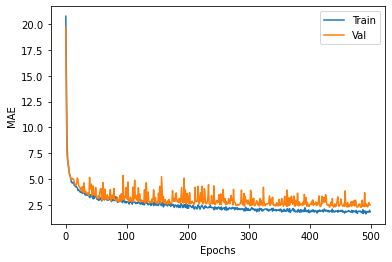

In [ ]:
plt.plot(history.epoch,np.array(history.history['mae']),label='Train')
plt.plot(history.epoch,np.array(history.history['val_mae']),label='Val')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

4/4 [==============================] - 0s 17ms/step


Text(0.5, 1.0, 'Real Vs Predictions')

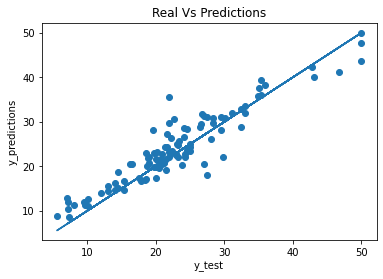

In [ ]:
y_predictions= model_conv1D.predict(x1_test)
plt.scatter(y_test,y_predictions)
plt.plot(y_test,y_test)
plt.xlabel('y_test')
plt.ylabel('y_predictions')
plt.title('Real Vs Predictions')

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  2.,
         1.,  1.,  4.,  3.,  4.,  4.,  8.,  6.,  6.,  6., 10.,  5.,  9.,
         5.,  6.,  3.,  5.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  2.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-9.426651  , -8.96274419, -8.49883737, -8.03493056, -7.57102374,
        -7.10711693, -6.64321011, -6.1793033 , -5.71539648, -5.25148967,
        -4.78758286, -4.32367604, -3.85976923, -3.39586241, -2.9319556 ,
        -2.46804878, -2.00414197, -1.54023515, -1.07632834, -0.61242152,
        -0.14851471,  0.31539211,  0.77929892,  1.24320573,  1.70711255,
         2.17101936,  2.63492618,  3.09883299,  3.56273981,  4.02664662,
         4.49055344,  4.95446025,  5.41836707,  5.88227388,  6.34618069,
         6.81008751,  7.27399432,  7.73790114,  8.20180795,  8.66571477,
         9.12962158,  9.5935284 , 10.05743521, 10.52134203, 10.98524884,
        11.44915565, 11.91306247, 12.37696928, 12.8408761 ,

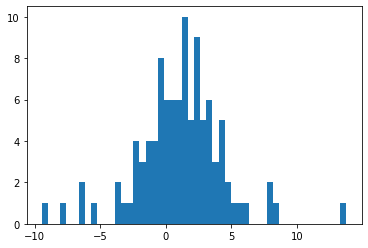

In [ ]:
#residues=y_predictions-y_test
residues=y_predictions.flatten()-y_test
plt.hist(residues,bins=50)